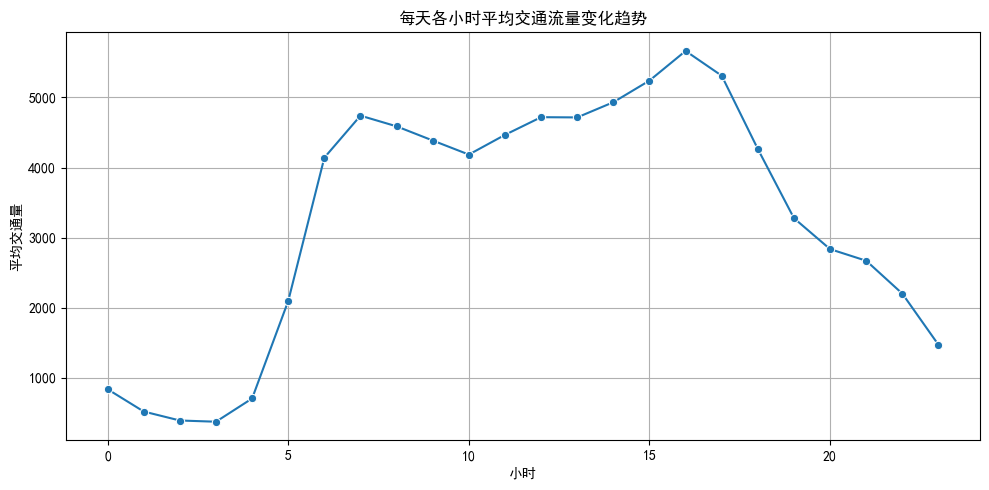

In [1]:

# 模块二：交通流量 EDA 可视化分析

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
df = pd.read_csv("处理后的_Metro_Interstate_Traffic_Volume.csv")


# 每小时平均交通量折线图
plt.figure(figsize=(10, 5))
hourly_avg = df.groupby('小时')['traffic_volume'].mean()
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title("每天各小时平均交通流量变化趋势")
plt.xlabel("小时")
plt.ylabel("平均交通量")
plt.grid(True)
plt.tight_layout()
plt.show()



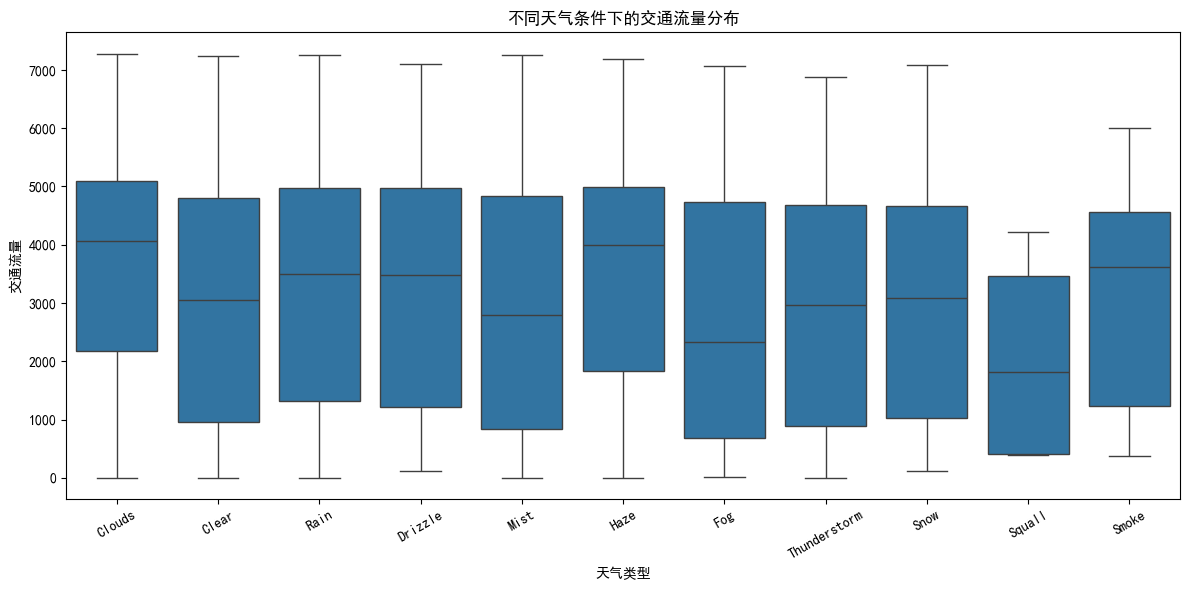

In [2]:
# 不同天气类型下交通量分布（箱线图）
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df)
plt.title("不同天气条件下的交通流量分布")
plt.xlabel("天气类型")
plt.ylabel("交通流量")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8676\2970905760.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_type', y='traffic_volume', data=df, ci=None)


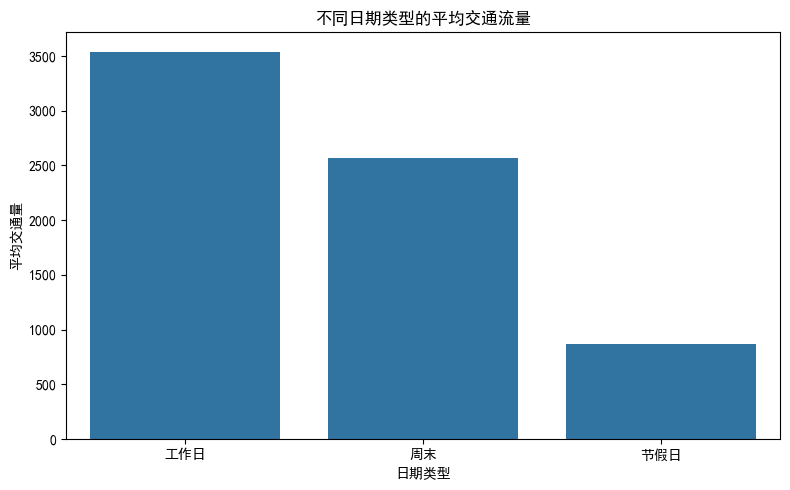

In [3]:
# 工作日 / 节假日 / 周末 对比（柱状图）
df['day_type'] = df.apply(
    lambda x: '节假日' if x['holiday'] == 1 else ('周末' if x['is_weekend'] == 1 else '工作日'), axis=1
)
plt.figure(figsize=(8, 5))
sns.barplot(x='day_type', y='traffic_volume', data=df, ci=None)
plt.title("不同日期类型的平均交通流量")
plt.xlabel("日期类型")
plt.ylabel("平均交通量")
plt.tight_layout()
plt.show()

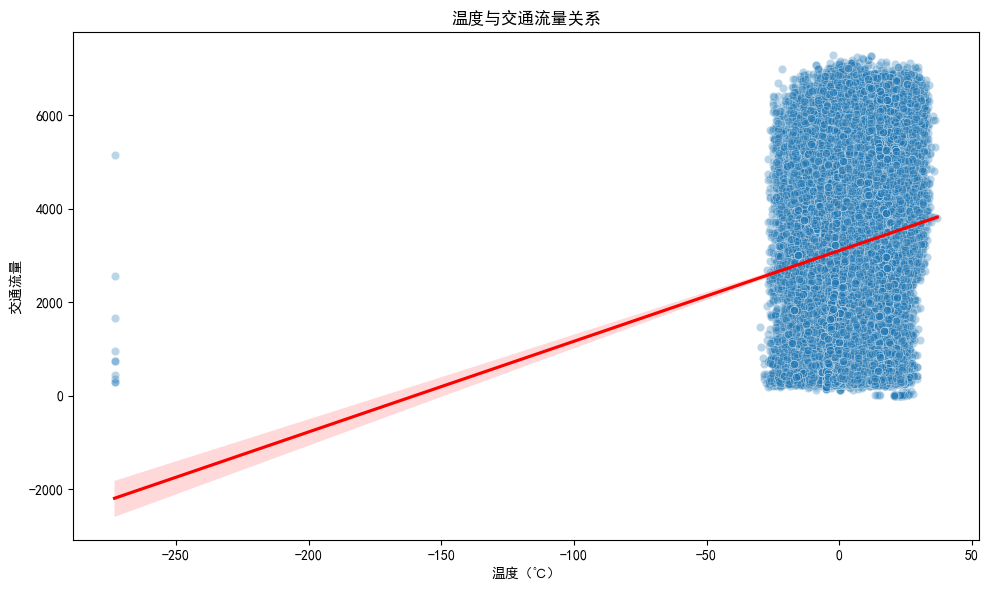

In [4]:
# 温度 vs 交通量（散点图 + 趋势线）
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_celsius', y='traffic_volume', data=df, alpha=0.3)
sns.regplot(x='temp_celsius', y='traffic_volume', data=df, scatter=False, color='red')
plt.title("温度与交通流量关系")
plt.xlabel("温度（℃）")
plt.ylabel("交通流量")
plt.tight_layout()
plt.show()

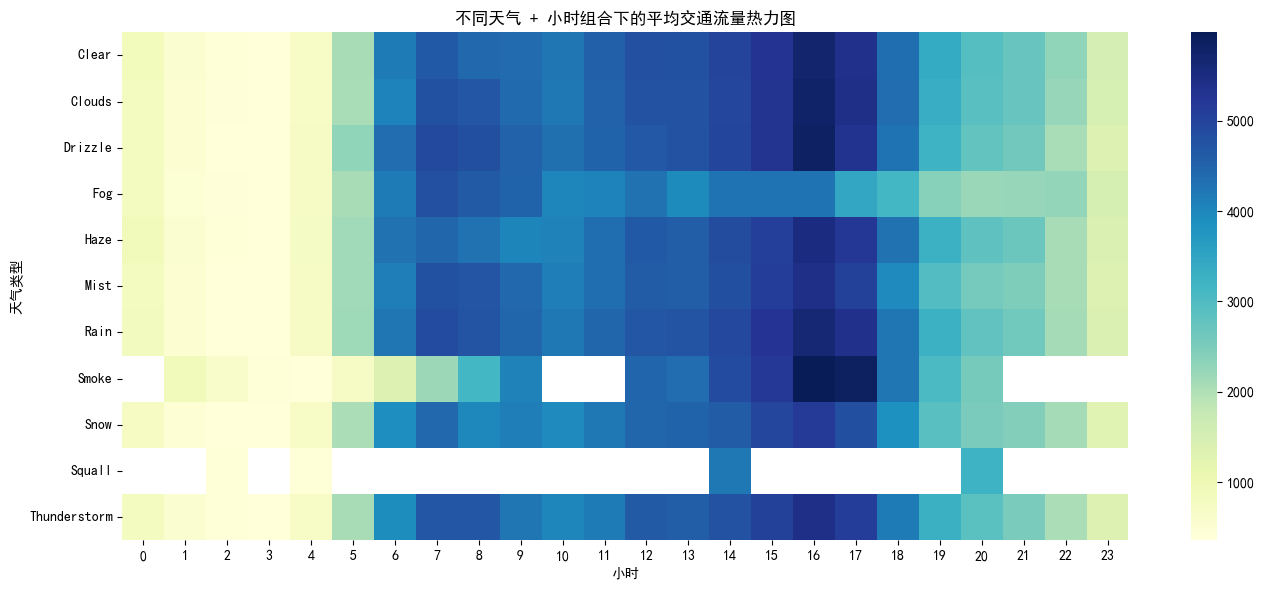

In [5]:
# 每小时 + 天气组合的平均交通热力图
pivot_table = df.pivot_table(index='weather_main', columns='小时', values='traffic_volume', aggfunc='mean')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title("不同天气 + 小时组合下的平均交通流量热力图")
plt.xlabel("小时")
plt.ylabel("天气类型")
plt.tight_layout()
plt.show()